# **Exercício KNN - Cogumelo**


Nesse exercício vamos usar o conjunto de dados `tmushroom_cleaned.csv`. Veja detalhes no enunciado a seguir

![Screen Shot 2024-04-27 at 11.16.00.png](<attachment:Screen Shot 2024-04-27 at 11.16.00.png>)
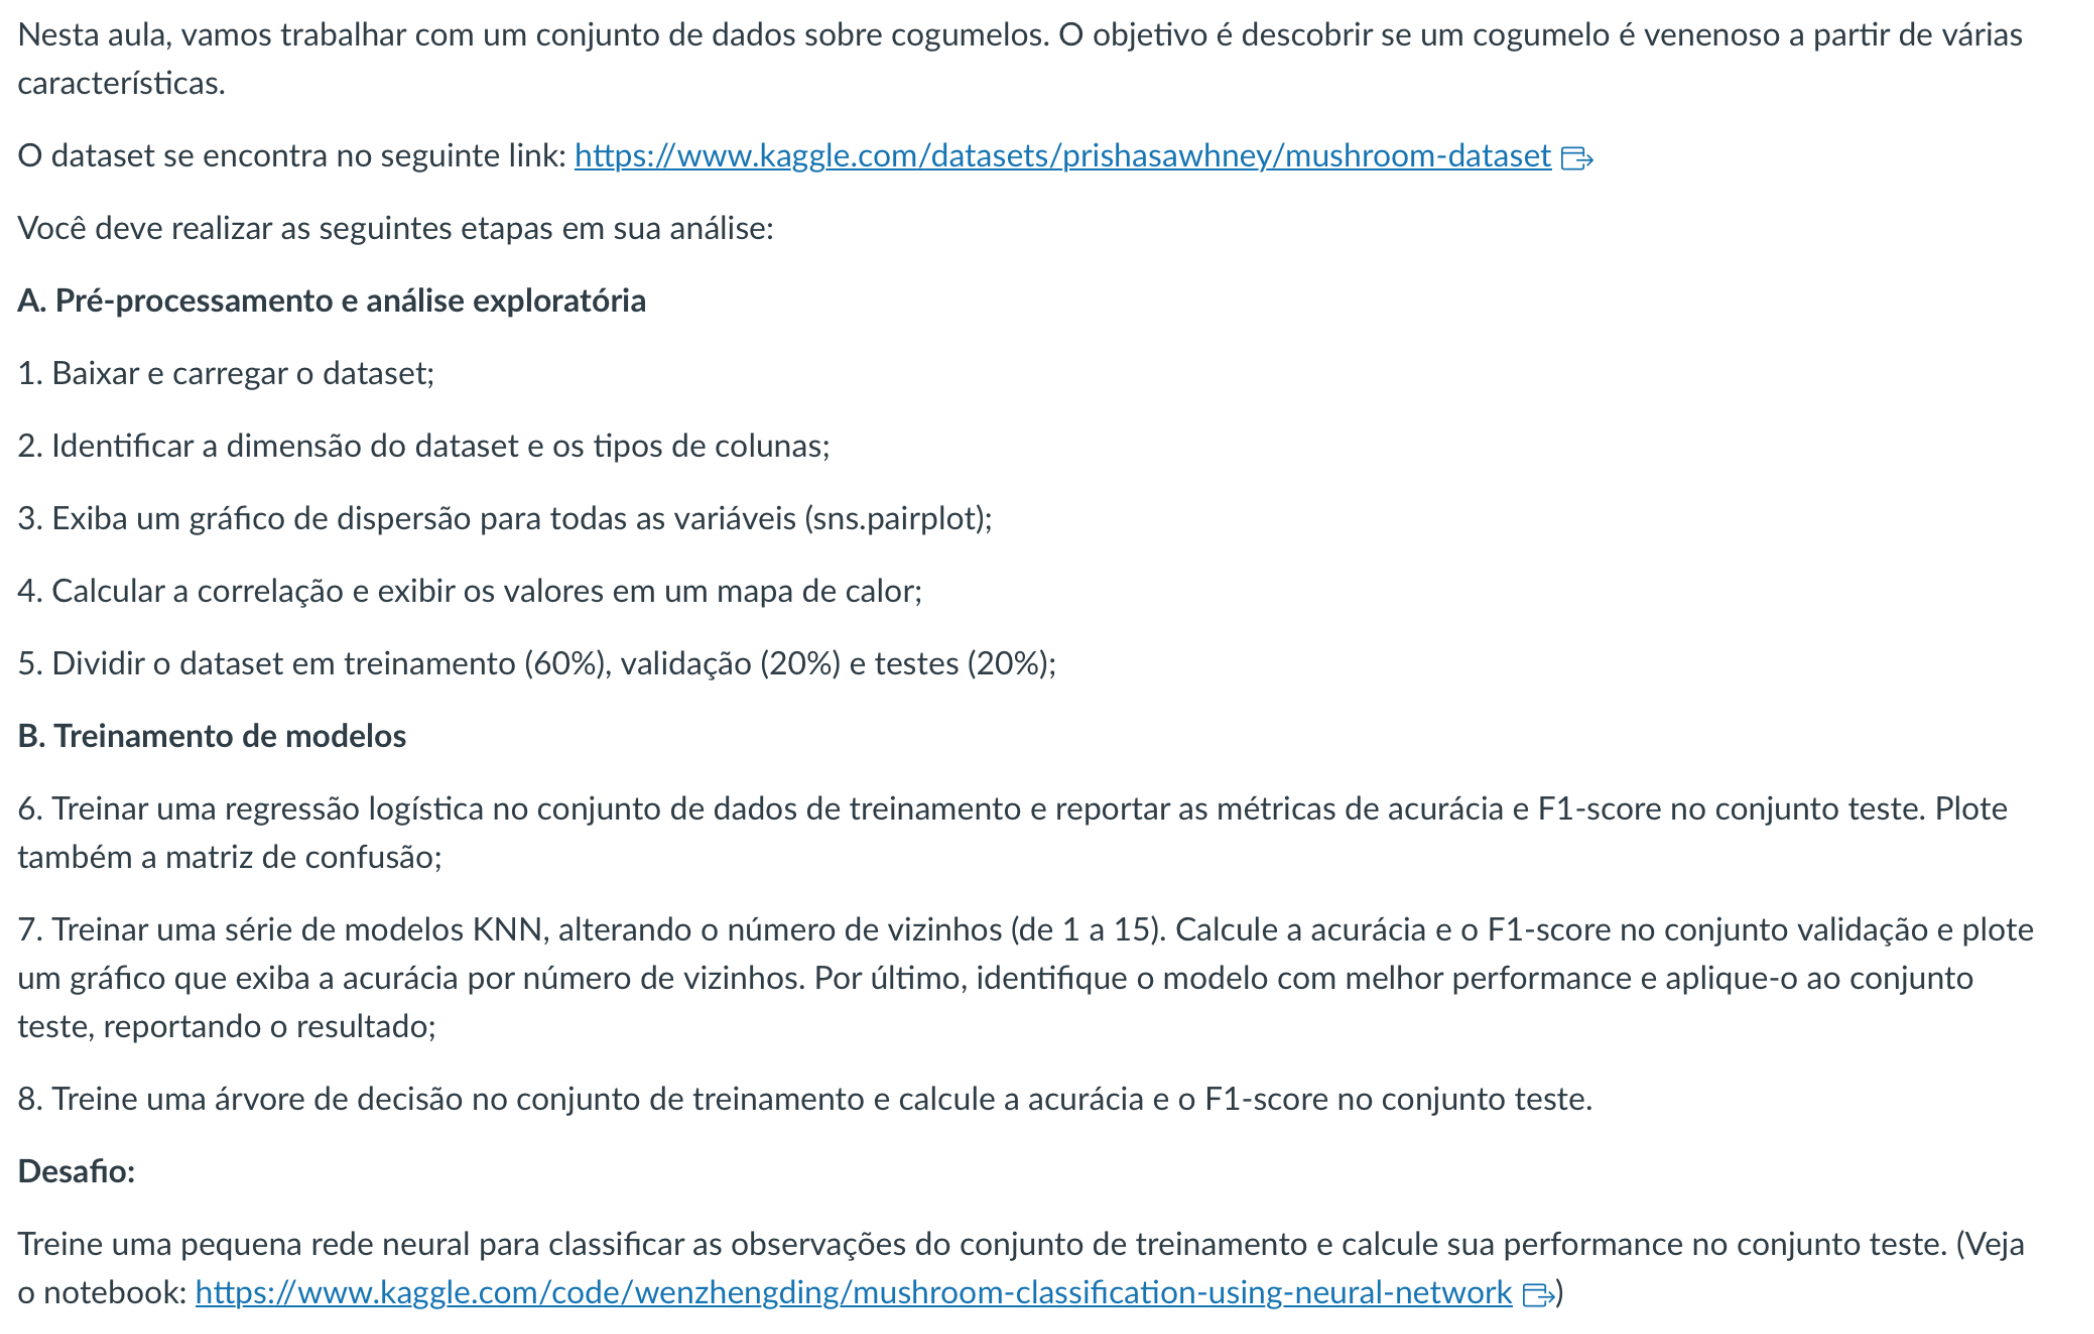

## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cogumelos_orig = pd.read_csv('mushroom_cleaned.csv')
pd.read_csv('mushroom_cleaned.csv')

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


## Análise exploratória

* Qual a dimensão dos conjunto de dados?
* Quais as colunas estão disponíveis para análise? Quais são os tipos de dados?
* Quais colunas são numéricas? Quais são categóricas ou cadastrais?
* Existem dados faltantes? Quantos? Em quais colunas? Em caso afirmativo, como proceder?

In [3]:
# Dimensão dos dados
print(f'a dimansao dos da tabela de dados é:{cogumelos_orig.shape}')

a dimansao dos da tabela de dados é:(54035, 9)


In [4]:
# Colunas disponíveis
print(cogumelos_orig.columns)

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')


In [5]:
# Tipos de dados
tipo_dados = cogumelos_orig.dtypes
print(tipo_dados)

cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object


In [6]:
# Colunas numéricas
numericas = cogumelos_orig.select_dtypes(include=['float', 'int']).columns
print(numericas)


Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')


In [7]:
# Colunas categóricas ou cadastrais
texto = cogumelos_orig.select_dtypes(include=['object']).columns
print(texto)

Index([], dtype='object')


In [21]:
# Dados faltantes

In [8]:
# Existem valores faltantes nas colunas 'Age', 'Cabin' e 'Embarked'
# Quantos valores faltantes?
print(cogumelos_orig.isnull().sum())

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64


## Gráficos de Dispersão

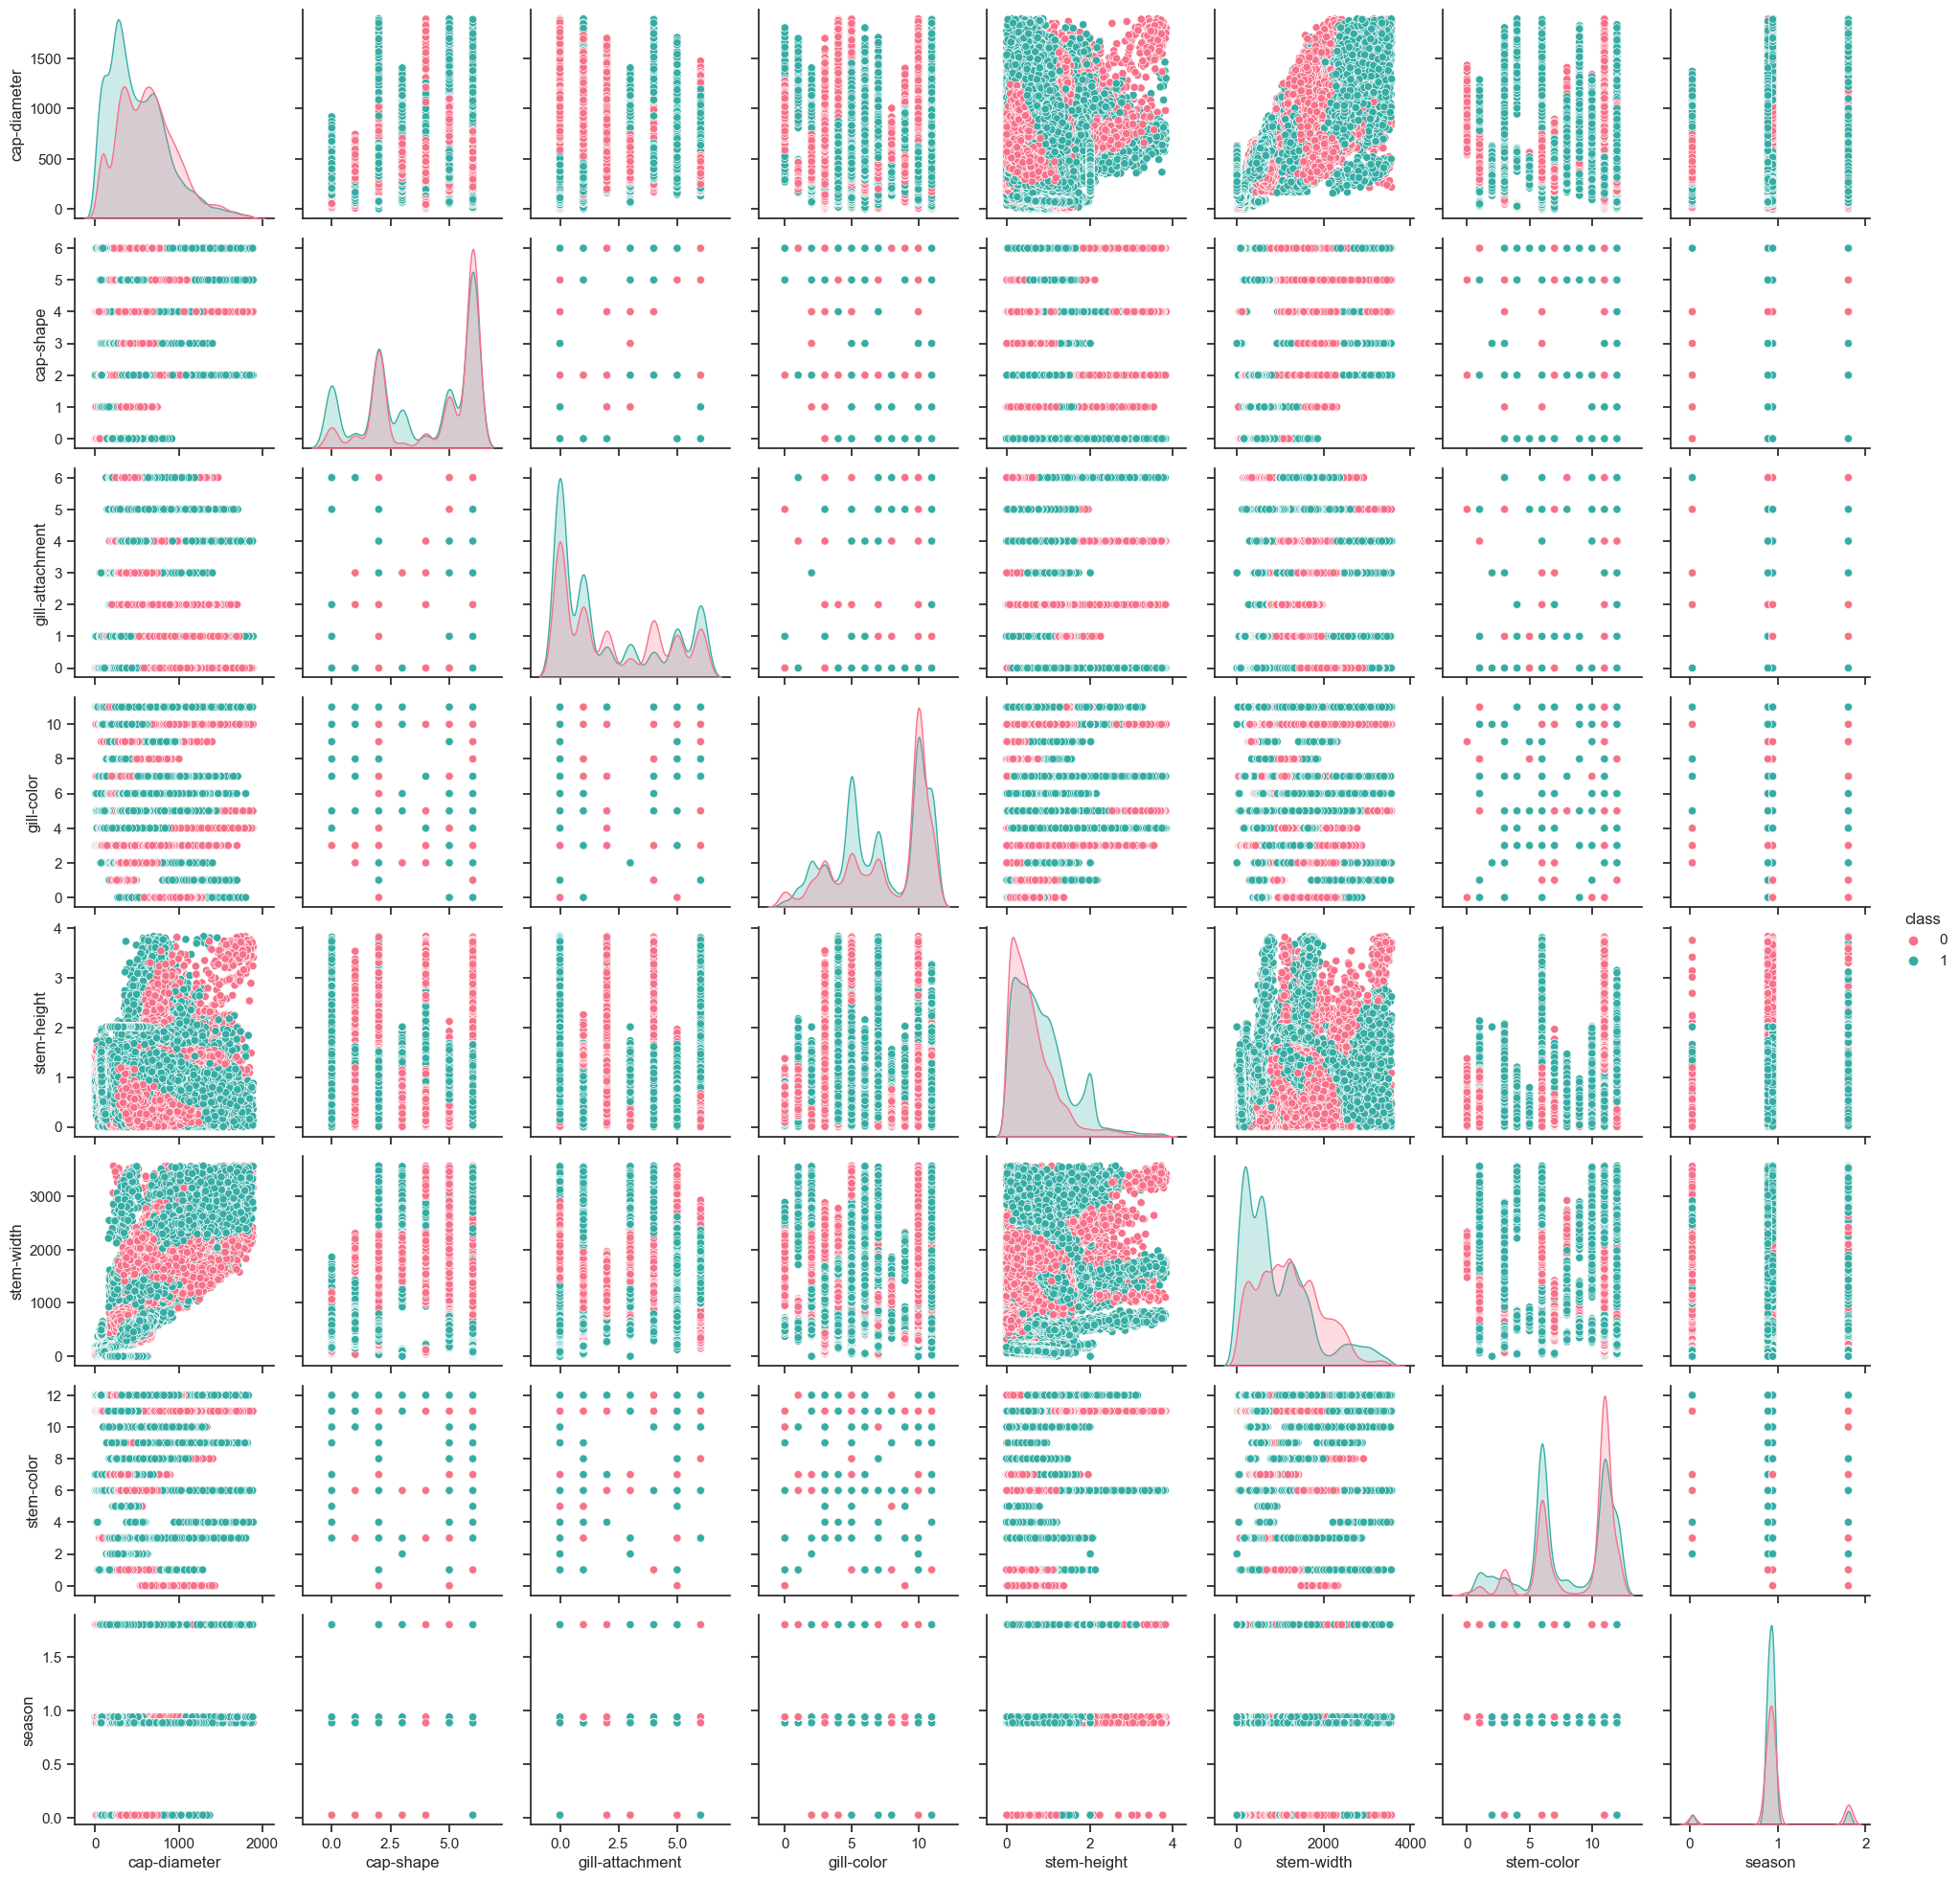

In [23]:
# Create a pairplot of all variables
sns.set(style="ticks")
pairplot = sns.pairplot(cogumelos_orig, hue='class', palette="husl")
plt.show()

## Correlação e Mapa de Calor

In [9]:
cogumelos_orig.corr(numeric_only=True)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
cap-diameter,1.000000,0.204011,0.200481,0.186377,0.135652,0.828469,0.121856,0.113334,-0.165676
cap-shape,0.204011,1.000000,0.043066,0.131387,-0.010393,0.222494,0.029035,0.055442,-0.133338
gill-attachment,0.200481,0.043066,1.000000,0.100276,-0.075284,0.245300,0.020073,-0.040315,-0.052541
gill-color,0.186377,0.131387,0.100276,1.000000,0.015057,0.110283,0.186090,0.059965,-0.063947
stem-height,0.135652,-0.010393,-0.075284,0.015057,1.000000,0.098095,0.002624,-0.000292,0.183354
stem-width,0.828469,0.222494,0.245300,0.110283,0.098095,1.000000,0.157394,0.040679,-0.182856
stem-color,0.121856,0.029035,0.020073,0.186090,0.002624,0.157394,1.000000,0.010750,-0.128339
season,0.113334,0.055442,-0.040315,0.059965,-0.000292,0.040679,0.010750,1.000000,-0.082919
class,-0.165676,-0.133338,-0.052541,-0.063947,0.183354,-0.182856,-0.128339,-0.082919,1.000000


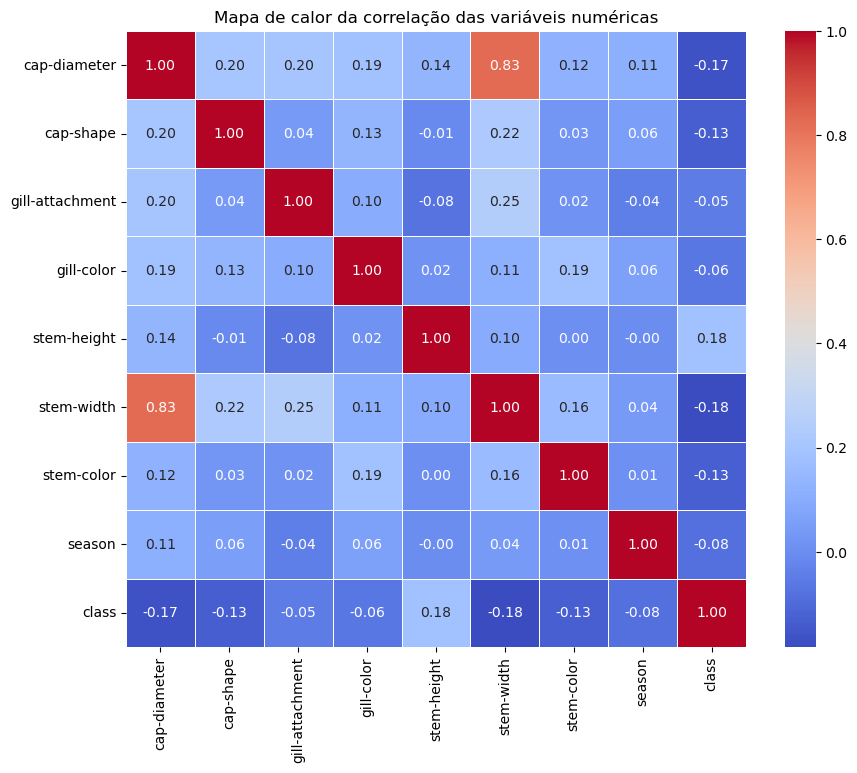

In [10]:
# Calcula a matriz de correlação
corr_matrix = cogumelos_orig.corr(numeric_only=True)

# Cria o mapa de calor
plt.figure(figsize=(10, 8))  # Ajusta o tamanho da figura
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=.5)
plt.title('Mapa de calor da correlação das variáveis numéricas')
plt.show()

## Configurando os conjuntos de treinamento, teste e validação

In [16]:
from sklearn.model_selection import train_test_split

# Dividir os dados em conjuntos de treinamento (60%) e temporário (40%)
train_data, temp_data = train_test_split(cogumelos_orig, test_size=0.4, random_state=42)

# Dividir o conjunto temporário em teste (50% de 40%, ou seja, 20% do total) e validação (50% de 40%, ou seja, 20% do total)
test_data, validation_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Exibir as proporções resultantes para confirmar
len(train_data), len(test_data), len(validation_data)

(32421, 10807, 10807)

### **Regressão Logística**

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix

# Selecionando as características (features) e o alvo (target)
X_train = train_data[['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season']]
y_train = train_data['class']

X_val = validation_data[['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season']]
y_val = validation_data['class']

X_test = test_data[['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season']]
y_test = test_data['class']

# Instanciando o escalador e normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Instanciando e treinando o modelo de Regressão Logística com dados normalizados
model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(X_train_scaled, y_train)

# Avaliando o modelo no conjunto de validação
predictions_val = model_LR.predict(X_val_scaled)
f1_val = f1_score(y_val, predictions_val, average='weighted')
print(f"F1-score no conjunto de validação: {f1_val:.2f}")
conf_matrix_val = confusion_matrix(y_val, predictions_val)
print("Matriz de confusão no conjunto de validação:")
print(conf_matrix_val)

# Usando o conjunto de teste para a avaliação final, se o desempenho na validação for satisfatório
predictions_test = model_LR.predict(X_test_scaled)
f1_test = f1_score(y_test, predictions_test, average='weighted')
print(f"F1-score no conjunto de teste: {f1_test:.2f}")
conf_matrix_test = confusion_matrix(y_test, predictions_test)
print("Matriz de confusão no conjunto de teste:")
print(conf_matrix_test)

F1-score no conjunto de validação: 0.63
Matriz de confusão no conjunto de validação:
[[2579 2266]
 [1725 4237]]
F1-score no conjunto de teste: 0.64
Matriz de confusão no conjunto de teste:
[[2658 2283]
 [1613 4253]]


## Tentativa de melhora nos resultados

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Preparando os dados novamente com o escalador incluído
scaler = StandardScaler()

# Criando um pipeline que primeiro normaliza os dados e depois aplica a regressão logística
pipeline = Pipeline([
    ('scaler', scaler),
    ('logreg', LogisticRegression(solver='liblinear', max_iter=1000))
])

# Definindo o espaço de parâmetros para a busca
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Valores de C para testar
    'logreg__penalty': ['l1', 'l2']  # L1 para lasso, L2 para ridge
}

# Criando o objeto GridSearchCV com o pipeline
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', verbose=1)

# Treinando o modelo com grid search usando os dados não normalizados diretamente, pois o pipeline cuida disso
grid.fit(X_train, y_train)

# Melhor modelo encontrado
best_model = grid.best_estimator_

# Avaliando o melhor modelo no conjunto de validação
predictions_val = best_model.predict(X_val)
f1_val = f1_score(y_val, predictions_val, average='weighted')
print(f"Melhor F1-score no conjunto de validação: {f1_val:.2f}")

# Matriz de confusão para o conjunto de validação
conf_matrix_val = confusion_matrix(y_val, predictions_val)
print("Matriz de confusão no conjunto de validação:")
print(conf_matrix_val)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Melhor F1-score no conjunto de validação: 0.63
Matriz de confusão no conjunto de validação:
[[2611 2234]
 [1719 4243]]


## Implementação de um KNN

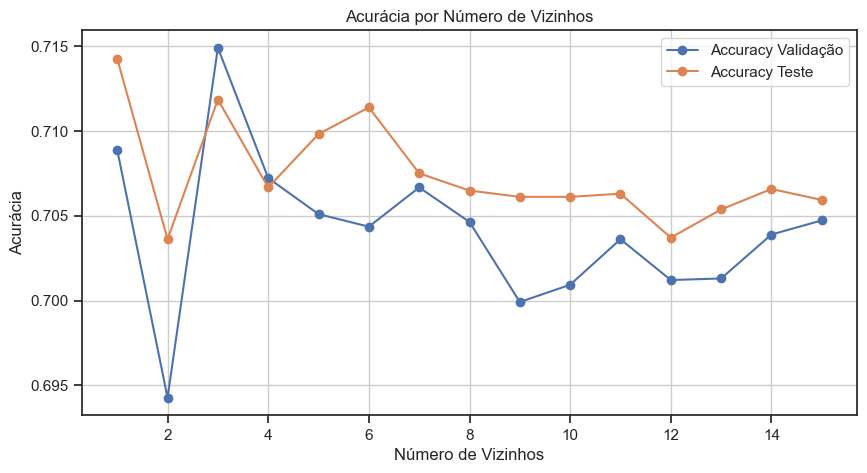

(3, 0.7149070047191635, 1, 0.7142592763949293)

In [31]:
# Sem normalização dos dados

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Listas para armazenar os resultados
f1_scores_val = []
accuracy_scores_val = []
f1_scores_test = []
accuracy_scores_test = []
neighbors_range = range(1, 16)

# Iterar sobre o número de vizinhos
for n_neighbors in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    # Avaliando no conjunto de validação
    predictions_val = knn.predict(X_val)
    f1_val = f1_score(y_val, predictions_val, average='weighted')
    accuracy_val = accuracy_score(y_val, predictions_val)
    f1_scores_val.append(f1_val)
    accuracy_scores_val.append(accuracy_val)
    
    # Avaliando no conjunto de teste
    predictions_test = knn.predict(X_test)
    f1_test = f1_score(y_test, predictions_test, average='weighted')
    accuracy_test = accuracy_score(y_test, predictions_test)
    f1_scores_test.append(f1_test)
    accuracy_scores_test.append(accuracy_test)

# Plotando os resultados
plt.figure(figsize=(10, 5))
plt.plot(neighbors_range, accuracy_scores_val, label='Accuracy Validação', marker='o')
plt.plot(neighbors_range, accuracy_scores_test, label='Accuracy Teste', marker='o')
plt.xlabel('Número de Vizinhos')
plt.ylabel('Acurácia')
plt.title('Acurácia por Número de Vizinhos')
plt.legend()
plt.grid(True)
plt.show()

# Identificando o melhor número de vizinhos
best_n_neighbors_val = np.argmax(accuracy_scores_val) + 1
best_accuracy_val = accuracy_scores_val[best_n_neighbors_val - 1]

best_n_neighbors_test = np.argmax(accuracy_scores_test) + 1
best_accuracy_test = accuracy_scores_test[best_n_neighbors_test - 1]

best_n_neighbors_val, best_accuracy_val, best_n_neighbors_test, best_accuracy_test


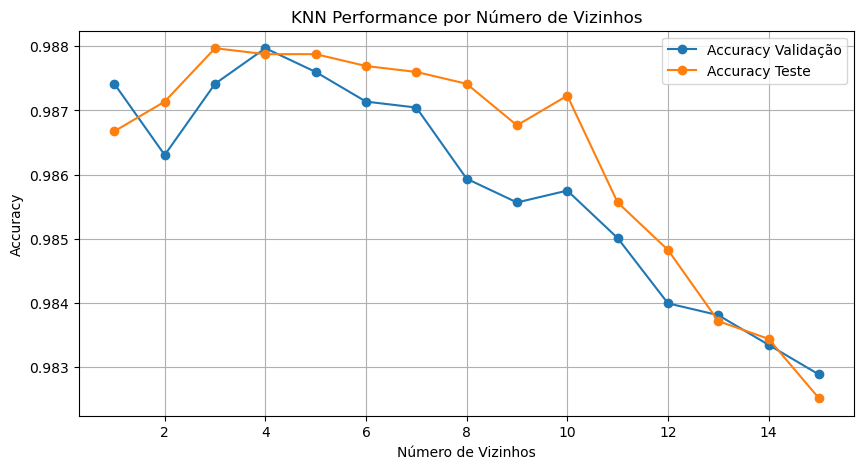

(4, 0.9879707596927917, 3, 0.9879707596927917)

In [22]:
# Normalizando os dados de treinamento

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Instanciando o escalador
scaler = StandardScaler()

# Preparando os dados
X_train = train_data[['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season']]
y_train = train_data['class']

X_val = validation_data[['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season']]
y_val = validation_data['class']

X_test = test_data[['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season']]
y_test = test_data['class']

# Normalizando os dados
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Listas para armazenar os resultados
f1_scores_val = []
accuracy_scores_val = []
f1_scores_test = []
accuracy_scores_test = []
neighbors_range = range(1, 16)

# Iterar sobre o número de vizinhos
for n_neighbors in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)
    
    # Avaliando no conjunto de validação
    predictions_val = knn.predict(X_val_scaled)
    f1_val = f1_score(y_val, predictions_val, average='weighted')
    accuracy_val = accuracy_score(y_val, predictions_val)
    f1_scores_val.append(f1_val)
    accuracy_scores_val.append(accuracy_val)
    
    # Avaliando no conjunto de teste
    predictions_test = knn.predict(X_test_scaled)
    f1_test = f1_score(y_test, predictions_test, average='weighted')
    accuracy_test = accuracy_score(y_test, predictions_test)
    f1_scores_test.append(f1_test)
    accuracy_scores_test.append(accuracy_test)

# Plotando os resultados
plt.figure(figsize=(10, 5))
plt.plot(neighbors_range, accuracy_scores_val, label='Accuracy Validação', marker='o')
plt.plot(neighbors_range, accuracy_scores_test, label='Accuracy Teste', marker='o')
plt.xlabel('Número de Vizinhos')
plt.ylabel('Accuracy')
plt.title('KNN Performance por Número de Vizinhos')
plt.legend()
plt.grid(True)
plt.show()

# Identificando o melhor número de vizinhos
best_n_neighbors_val = np.argmax(accuracy_scores_val) + 1
best_accuracy_val = accuracy_scores_val[best_n_neighbors_val - 1]

best_n_neighbors_test = np.argmax(accuracy_scores_test) + 1
best_accuracy_test = accuracy_scores_test[best_n_neighbors_test - 1]

best_n_neighbors_val, best_accuracy_val, best_n_neighbors_test, best_accuracy_test

## Árvore de decisão

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# Instanciando o modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)

# Treinando o modelo com o conjunto de treinamento
dt_model.fit(X_train, y_train)

# Avaliando o modelo no conjunto de validação
predictions_val_dt = dt_model.predict(X_val)
accuracy_val_dt = accuracy_score(y_val, predictions_val_dt)
f1_val_dt = f1_score(y_val, predictions_val_dt, average='weighted')

# Avaliando o modelo no conjunto de teste
predictions_test_dt = dt_model.predict(X_test)
accuracy_test_dt = accuracy_score(y_test, predictions_test_dt)
f1_test_dt = f1_score(y_test, predictions_test_dt, average='weighted')

print("Validação - Acurácia:", accuracy_val_dt, "F1-Score:", f1_val_dt)
print("Teste - Acurácia:", accuracy_test_dt, "F1-Score:", f1_test_dt)


Validação - Acurácia: 0.9757564541500879 F1-Score: 0.9757550402070231
Teste - Acurácia: 0.9739983344128805 F1-Score: 0.9739972914425289


## Usando um Rede Neural

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

# Instanciando o modelo de rede neural
nn_model = MLPClassifier(random_state=42, max_iter=1000)

# Treinando o modelo com o conjunto de treinamento
nn_model.fit(X_train, y_train)

# Avaliando o modelo no conjunto de validação
predictions_val_nn = nn_model.predict(X_val)
accuracy_val_nn = accuracy_score(y_val, predictions_val_nn)
f1_val_nn = f1_score(y_val, predictions_val_nn, average='weighted')

# Avaliando o modelo no conjunto de teste
predictions_test_nn = nn_model.predict(X_test)
accuracy_test_nn = accuracy_score(y_test, predictions_test_nn)
f1_test_nn = f1_score(y_test, predictions_test_nn, average='weighted')

print("Validação - Acurácia:", accuracy_val_nn, "F1-Score:", f1_val_nn)
print("Teste - Acurácia:", accuracy_test_nn, "F1-Score:", f1_test_nn)



Validação - Acurácia: 0.6652169889886185 F1-Score: 0.6527481284521578
Teste - Acurácia: 0.679467012121773 F1-Score: 0.6675646554542746


## Trabalhando os hiperparametros da rede

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

# Instanciando o modelo de rede neural com parâmetros ajustados
nn_model_improved = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Duas camadas, com 100 e 50 neurônios respectivamente
    activation='tanh',             # Mudança da função de ativação para 'tanh'
    solver='adam',                 # Usando 'adam' como otimizador
    alpha=0.001,                   # Ajuste fino do termo de regularização
    learning_rate_init=0.001,      # Taxa de aprendizado inicial
    max_iter=1000,                 # Aumentando o número de iterações
    random_state=42,               # Para garantir reprodutibilidade
    early_stopping=True,           # Habilitar parada antecipada
    validation_fraction=0.1        # Fração dos dados de treinamento usada para validação (parada antecipada)
)

# Treinando o modelo com o conjunto de treinamento
nn_model_improved.fit(X_train, y_train)

# Avaliando o modelo no conjunto de validação
predictions_val_nn_improved = nn_model_improved.predict(X_val)
accuracy_val_nn_improved = accuracy_score(y_val, predictions_val_nn_improved)
f1_val_nn_improved = f1_score(y_val, predictions_val_nn_improved, average='weighted')

# Avaliando o modelo no conjunto de teste
predictions_test_nn_improved = nn_model_improved.predict(X_test)
accuracy_test_nn_improved = accuracy_score(y_test, predictions_test_nn_improved)
f1_test_nn_improved = f1_score(y_test, predictions_test_nn_improved, average='weighted')

print("Validação - Acurácia:", accuracy_val_nn_improved, "F1-Score:", f1_val_nn_improved)
print("Teste - Acurácia:", accuracy_test_nn_improved, "F1-Score:", f1_test_nn_improved)


Validação - Acurácia: 0.7332284630332192 F1-Score: 0.7335891415487128
Teste - Acurácia: 0.7365596372721385 F1-Score: 0.736694643682085


Obs: KNN performou melhor após normalização dos dodos.
